<a href="https://colab.research.google.com/github/springboardmentor458/OBJECT_RECOGNITION_SYSTEM_Infosys_Internship_Oct2024/blob/Rohan-Arora/milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  OpenCV install
!pip install opencv-python-headless

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # displaying images in Colab
import numpy as np

In [ ]:
!wget -q https://raw.githubusercontent.com/chuanqi305/MobileNet-SSD/deploy.prototxt -O deploy.prototxt
!wget -q https://github.com/chuanqi305/MobileNet-SSD/raw/master/mobilenet_iter_73000.caffemodel -O mobilenet_iter_73000.caffemodel


In [ ]:
!ls


deploy.prototxt  mobilenet_iter_73000.caffemodel  sample_data


In [ ]:
net = cv2.dnn.readNetFromCaffe("/content/deploy.prototxt", "/content/mobilenet_iter_73000.caffemodel")

In [ ]:
# Loaded the image
image = cv2.imread("/content/gettyimages-1524680694-612x612.jpg")

# Checked it
if image is None:
    print("Error: Could not load image. Check the file name and path.")
else:
    print("Image loaded successfully.")


Image loaded successfully.


In [ ]:
# Loaded the model
net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "mobilenet_iter_73000.caffemodel")

# Checked
if net.empty():
    print("Model could not be loaded. Check the model files.")
else:
    print("Model loaded successfully.")


Model loaded successfully.


In [ ]:
# Remove the corrupted deploy.prototxt file
!rm -f /content/deploy.prototxt

# Re-download deploy.prototxt from an alternate source
!wget -O /content/deploy.prototxt https://github.com/chuanqi305/MobileNet-SSD/raw/master/deploy.prototxt


--2024-11-12 05:40:33--  https://github.com/chuanqi305/MobileNet-SSD/raw/master/deploy.prototxt
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chuanqi305/MobileNet-SSD/master/deploy.prototxt [following]
--2024-11-12 05:40:33--  https://raw.githubusercontent.com/chuanqi305/MobileNet-SSD/master/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44667 (44K) [text/plain]
Saving to: ‘/content/deploy.prototxt’

/content/deploy.pro 100%[===================>]  43.62K  --.-KB/s    in 0.02s   

2024-11-12 05:40:33 (2.56 MB/s) - ‘/content/deploy.prototxt’ saved [44667/44667]



In [ ]:
!ls -lh /content/deploy.prototxt

-rw-r--r-- 1 root root 0 Nov 12 05:33 /content/deploy.prototxt


In [ ]:
import cv2

# Attempt to load the model with the current deploy.prototxt and mobilenet_iter_73000.caffemodel
net = cv2.dnn.readNetFromCaffe("/content/deploy.prototxt", "/content/mobilenet_iter_73000.caffemodel")

# Check if the model loaded correctly
if net.empty():
    print("Model could not be loaded. Check the model files.")
else:
    print("Model loaded successfully.")


Model loaded successfully.


In [ ]:
# Resize and prepare the image for the model
(h, w) = image.shape[:2]  # Get the dimensions of the image
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)
net.setInput(blob)


Object detection completed.


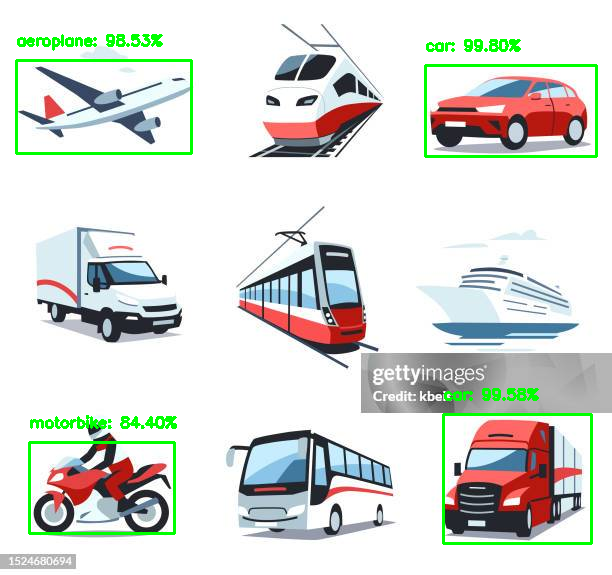

In [ ]:
import cv2
import numpy as np

# Perform object detection and store the results in 'detections'
detections = net.forward()
print("Object detection completed.")

# Define the list of class labels MobileNet-SSD was trained on
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant",
           "sheep", "sofa", "truck", "train", "tvmonitor"]

# Loop over the detections
for i in range(detections.shape[2]):
    # Extract the confidence (i.e., probability) associated with the prediction
    confidence = detections[0, 0, i, 2]

    # Filter out weak detections by ensuring the confidence is greater than 20%
    if confidence > 0.2:
        # Extract the index of the class label and compute the (x, y)-coordinates of the bounding boxes
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # Draw the bounding box and label on the image
        label = f"{CLASSES[idx]}: {confidence * 100:.2f}%"
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the output image with bounding boxes
from google.colab.patches import cv2_imshow
cv2_imshow(image)